In [ ]:
import numpy as np
import pandas as pd

# run later, causes issuse with malplotlib 
# from IPython.core.interactiveshell import InteractiveShell # multiline output, so `x` does `print(x)`
# InteractiveShell.ast_node_interactivity = "all"

Read more on the basics to [NumPy - 'C style arrays in python'](https://numpy.org/doc/1.18/numpy-user.pdf#page=11) | [Linear Algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) 

Read more on [Pandas - 'excel in python'](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) | [Docs](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas) | [Cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* 2D Arrays, `df.plot()` 

Read more about [SciPy](https://docs.scipy.org/doc/scipy/reference/#tutorial)
* Calculus, Optimization, Signal processing, FFT, statistics

Read more on [MatPlotLib - 'ugly but functional plots'](https://matplotlib.org/3.2.1/tutorials/index.html) | [Docs 3rd party](https://realpython.com/python-matplotlib-guide/)


In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# output = []
print('Numbers:', numbers)

for number in numbers: 
  number = number * number 
  # output.append(number)

print('Numbers^2: ', numbers)
# print('Output:  ', output)
# numbers = output

# or 

numbers_list_comprehension = [number**2 for number in numbers]
print('Numbers^2 with list comprehension syntax: \n\t   ', numbers_list_comprehension)

Numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Numbers^2:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Numbers^2 with list comprehension syntax: 
	    [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [ ]:
# print(len(numbers)) # 10
# print(range(5))     # range(0, 5)

for idx in range(len(numbers)): 
  numbers[idx] = numbers[idx] * numbers[idx]
print('Numbers: ', numbers)

Numbers:  [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


This is the "C style for loop". 

while this first is a "for-each loop", it is seen in other languages too, it is [sometimes faster](https://stackoverflow.com/a/256861/5728614)

```
len([1,2,3,4,5])+1 

len([1,2,3,4,5] + 1) # error... less obvious len(myList+1)
# error is suppressed pandas, be careful
```

In [ ]:
n = [1,1,1,1,1,2,2,2,2,2,3,3,4]
print(set(n), ' remove duplicates')
print(len(set(n)), '\t      unique elements')

{1, 2, 3, 4}  remove duplicates
4 	      unique elements


## Numpy lets us do vectorized operations on the CPU

In [ ]:
try: 
  print(numbers/10) # Python list 
except Exception as e:
  print(e)
  print("Error: unsupported operand type(s) for /: 'list' and 'int'   \nWe cant divide a list by a number\n")


print('However, we can in NumPy:', np.array(numbers)/10)

unsupported operand type(s) for /: 'list' and 'int'
Error: unsupported operand type(s) for /: 'list' and 'int'   
We cant divide a list by a number

However, we can in NumPy: [ 0.1  0.4  0.9  1.6  2.5  3.6  4.9  6.4  8.1 10. ]


for lists and NumPy, [Python List Comprehension syntax is much faster](https://www.programiz.com/python-programming/list-comprehension) but less versatile.

Othen its faster to apply a [Lamba](https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7) 

C++ syle programing is often a 'bad' way to do things

<img src="https://i.imgur.com/FPbPsLO.png " alt="drawing" width="300"/>

Lets Go over

*   Pandas
*   Numpy
*   CuPy

A DataFrame is a construct for a 2D array (Matrix)


In [ ]:
%%capture
#hide prints

!pip install yfinance
import yfinance

In [ ]:
df = yfinance.download("t.to") # T is AT&T
# df.tail(5)
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-12,5.9375,5.9375,5.8450,5.9075,2.139365,394400
1995-01-13,5.9375,5.9375,5.7825,5.8125,2.104961,76000
1995-01-16,5.8125,5.8450,5.7825,5.8125,2.104961,70400
1995-01-17,5.7825,5.7825,5.6875,5.7500,2.082326,112400
1995-01-18,5.6875,5.7200,5.6875,5.6875,2.059691,60800


In [ ]:
df.describe()
# df.corr()

,Open,High,Low,Close,Adj Close,Volume
count,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6.414000e+03
mean,12.970495,13.092584,12.864279,12.981911,9.031048,2.327247e+06
std,6.245854,6.277219,6.222063,6.249906,6.686632,2.512064e+06
min,1.750000,1.772500,1.440000,1.525000,0.760416,0.000000e+00
25%,8.037500,8.126875,7.950000,8.025000,3.747595,1.056550e+06
50%,11.225000,11.362500,11.125000,11.247500,6.194226,1.903800e+06
75%,18.758750,18.940001,18.628749,18.780001,14.535185,2.913200e+06
max,27.549999,27.740000,27.459999,27.674999,27.021269,6.230600e+07


In [ ]:
# file location, local or URL.... raw CSV on github. Avoid Kaggle's API  ;) 
# pandas.read_csv

# hit CTRL + Space
# df.to_

In [ ]:
close = df.Close #  same as df['Close']

print(type(df))
print(type(close))
print(type(close.values))

assert df.shape == df.values.shape # Hence, True 
print(df.values.shape) # df.values is a quick way to get a 2d array
print(df.values[:1]) # df.values is a quick way to get a 2d array

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(6414, 6)
[[5.93750000e+00 5.93750000e+00 5.84499979e+00 5.90749979e+00
  2.13936496e+00 3.94400000e+05]]


array([5.90749979, 5.8125    , 5.8125    , 5.75      , 5.6875    ,
       5.6875    , 5.6875    , 5.5625    , 5.625     , 5.78249979])

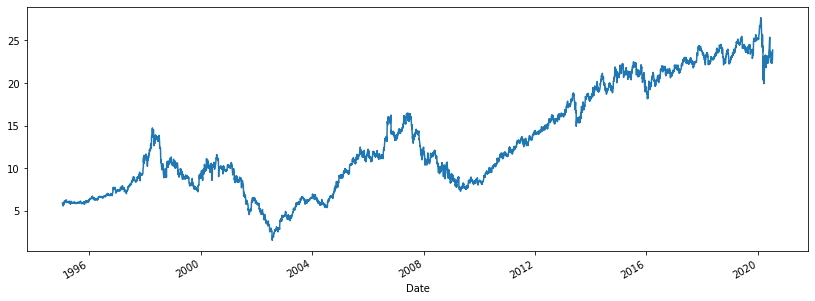

In [ ]:
# df.plot() #all columns (feature vectors) 
close.plot(figsize=(14,5))

# close = close.to_list()
close = close.to_numpy() # now we lost the time axis :'(
close[:10]

In [ ]:
close # dont worry, be can stick it back in the DF to get back time... for plotting purposes
#do_stuff_to_close()
df['close_V2'] = close 

In [ ]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,close_V2
Date,,,,,,,
1995-01-12,5.9375,5.9375,5.8450,5.9075,2.139365,394400,5.9075
1995-01-13,5.9375,5.9375,5.7825,5.8125,2.104961,76000,5.8125
1995-01-16,5.8125,5.8450,5.7825,5.8125,2.104961,70400,5.8125


In [ ]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,close_V2
Date,,,,,,,
2020-07-14,22.690001,23.200001,22.690001,23.160000,23.160000,2228500,23.160000
2020-07-15,23.230000,23.570000,23.230000,23.549999,23.549999,2162300,23.549999
2020-07-16,23.410000,23.920000,23.410000,23.879999,23.879999,1833100,23.879999


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# inline images. sometimes needed

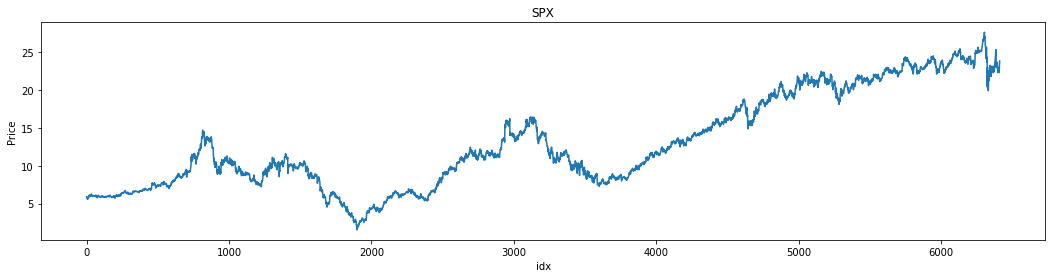

In [ ]:
plt.figure(figsize=(18,4))

plt.title('SPX')
plt.xlabel('idx')
plt.ylabel('Price')
plt.plot(close)

plt.show()

# This code below caused title and labels to not work... or be printed twice....  
from IPython.core.interactiveshell import InteractiveShell # multiline output, so `x` does `print(x)`
InteractiveShell.ast_node_interactivity = "all"

import cupy
cupy.cuda.Device(0).use() # to select device, if you have multiple GPUs

In [ ]:
np_range = np.arange(100000000)   # lives on  the CPU [0...100000000)
cp_range = cupy.arange(100000000) # lives on  the GPU 
print(np_range) # 100,000,000

#1. scale a vector
#2. Pythagorean theorem in 100,000,000 dimensions 

[       0        1        2 ... 99999997 99999998 99999999]


In [ ]:
output = 9999999999999999999 * np_range
output = 9888888888888888888 * np_range
output = 9777777777777777777 * np_range

In [ ]:
output = 9999999999999999999 * cp_range 
output = 9888888888888888888 * cp_range 
output = 9777777777777777777 * cp_range 

# OMG its faster!!!
# if I showed with a profiler, we'll see most of the time is spent transferring data to the GPU
# output and scaler is on our CPU. 

In [ ]:
# %%timeit
# np.linalg.norm(np_range) # 1 loop, best of 3: 227 ms per loop

In [ ]:
# %%timeit
# cupy.linalg.norm(cp_range) # 100 loops, best of 3: 99.7 ms per loop

[FFT and deTrend demo - SciPy](https://github.com/alik604/Notebooks/blob/master/DSP/Learning_DSP.ipynb)


*   [Bettter deTrend - statsmodels.tsa.tsatools.detrend](https://www.statsmodels.org/devel/generated/statsmodels.tsa.tsatools.detrend.html)
    * As I recall there is a better method used, and has a better plot. the source code and docs make the two look the same....



# Now for Machine Leanring

<img src="https://scikit-learn.org/stable/_static/ml_map.png" alt="drawing" width="900"/>


## Preprocessing - Convert categorical data to numerical data, so we can use ML
*   [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) Encode target labels with value between 0 and n_classes-1.
    + [apple, orange, banana, banana, apple] ->  [1, 2, 3, 3, 1]


## Preprocessing - scaling numerical data

We want to do this to each column. Not the the row

*   [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is my choice by default `Z = (X_i - Mean) / STD`
> Better than MinMax for optimizing a gradient (neural networks)

*   [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) `(X - X.min) / (X.max - X.min)` 

*   [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) 
      * Normalize **samples** individually to unit norm.
> Rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

*    [Docs - Guide](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#powertransformer)
      *  PowerTransformer
      *  QuantileTransformer 

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_002.png" alt="drawing" width="900"/>
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_003.png" alt="drawing" width="900"/>


## Dimensionality Reduction
### Principal component analysis (PCA).

Linear dimensionality reduction to project data to a lower dimensional space

We run StandardScaler before dimensionality reduction, because: [Why do we need to normalize data before principal component analysis (PCA)?](https://stats.stackexchange.com/a/69159)
> (Normalization is important in PCA since) it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance. 

> My explanation: "Gaussian is Good". Good thing about Notebooks is that we can test to see if its a good idea or not

The [Occilating movement](https://stats.stackexchange.com/a/427404) might be Gradient Descent (not so fun fact, lots of math in that link, beware) 

<img src="https://miro.medium.com/max/1400/1*XGaA7KWUlhWZLIezYEBIHA.gif" alt="drawing" width="900" height = "400"/>

[Why not PCA on all data](https://stackoverflow.com/a/40801571)

Note: untested, but according to my intuition, PCA on noisy data (or pure noise) is very bad...  

#### Docs - Scikit learn
*   [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
*   [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD) 
*   [other](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) 

### Removing data 
[my Blog post with code link, on this another cyber-sec AD dataset, on dim reduction](https://medium.com/@alik604/dimensionality-reduction-effects-on-model-accuracy-c021f4f33a61) 

* Remove features with low correlation to feature we want to predict `df.corrwith` 
* Remove features with (very) low standard deviations `df.std`
* Use a Scikit-learn tree's `feature_importances_` to select which to remove

...or we just stick to PCA, or other 'decomposition' methods


## Train Test split
leave out 15-30% of data to see if the model is useful on **unseen** data


## Which model

Treat it like a black box, dont try to understand everything. Try them all, as the code is **VERY** portable. Dispite running the the CPU, they are (often) very fast 

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import * 
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
import xgboost

DLed = False

Note that `pd.concat` and `myDataFrame.drop` both take a list, and the latter takes a axis 

I combine train & test to `combined_data`, so minimize work. 

Do not `fit` a `scaler` on the test data like I do. this is leaking information. 



In [ ]:
if not DLed:
    train = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_training-set.csv')
    test = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_testing-set.csv')
    DLed = True
combined_data = pd.concat([train, test]).drop(['id','label'], axis = 1)
combined_data.shape 
combined_data.head(10)

In [ ]:
combined_data.describe() # sinpkt has mean = 912; STD = 6922. I consider this to be odd and a sign of a huge skew. 

In [ ]:
tmp = train.where(train['attack_cat'] == "Normal").dropna()
print('ratio of _Normal_ in Train: ', round(tmp.shape[0]/train.shape[0],5)) # 31% of train data is Normal (not an attack)

tmp = test.where(test['attack_cat'] == "Normal").dropna()
print('ratio of _Normal_ in Test:  ', round(tmp.shape[0]/test.shape[0],5))

vector = combined_data['attack_cat']
print("attack cats:", list(set(vector))) 

import collections
from tabulate import tabulate # from stack overflow, https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
counter = collections.Counter(vector)  
print(tabulate(counter.most_common(), headers = ['Type','Occurences']))

In [ ]:
s_test = collections.Counter(test['state']).keys()
s_train = collections.Counter(train['state']).keys()
print('NEW stuff in test set ',set(s_test)-set(s_train))

counter = collections.Counter(test['state'])  
print(tabulate(counter.most_common(), headers = ['Type','Occurences']))

# s_test = collections.Counter(test['service']).keys()
# s_train = collections.Counter(train['service']).keys()
# print('NEW stuff in test set ',set(s_test)-set(s_train))

# s_test = collections.Counter(test['proto']).keys()
# s_train = collections.Counter(train['proto']).keys()
# print('NEW stuff in test set ',set(s_test)-set(s_train))

### Fixing data ("feature engineering") 

we have unseen data in the test. 

If we are converting categorical data to nemerical, SOMETIMES its ok to fit on test data (don't do this in NLP, "natural language processing")
#### How to deal with this?

if continuous, replace missings or unknown data, with the median, mean, maybe* the mode (probabily not mode...). 
* if its a time series, you can repair the data with average of nearby points

if categorical, replace with the mode (never the mean or the median!) 

------------

### SKlearn functions are simple and **consistent**

[Docs - LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Fitting to testing data is (often or arguably) leaking information

*   fit(x) 
>  is akin to `map`
*   transform(x)   
> is akin to `apply map`
*   fit_transform(x)
> is akin to `map and apply map`
*   inverse_transform(_x_)
> is akin to `undo mapping`

*   predict(X_test)
> X_test -> prediction vector

*   score(X_test, y_test)
> portions of correct prediction

* [Metrics to Evaluate your Machine Learning Algorithm](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234) - concise and to the point 






In [ ]:
combined_data.head(1)

columns = combined_data.columns # save
categorical = ['attack_cat', 'proto', 'service', 'state']

for cat in categorical: # note this type of for-loop is ok here, since we are working on a DataFrame. Python...🙄 
  encoder = LabelEncoder()
  combined_data[cat] = encoder.fit_transform(combined_data[cat]) # we called fit on test data..... This should be fine*, but we are technically leaking information.
  # Test seems to have a unseen class of attack

combined_data.head(1)


```
_ = encoder.fit(train[cat]) # "Returns the instance itself", mutates `encoder` OBJ 
train[cat] = encoder.transform(train[cat])
test[cat] = encoder.transform(test[cat])
```
Errror! `y contains previously unseen labels: [131, 132]`. Our train is not representative of our sample
* [solution? dont use sklearn... HAHA](https://stackoverflow.com/a/56876351). This person fixed sklearn


In [ ]:
y = combined_data['attack_cat']
X = combined_data.drop(['attack_cat'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .90, random_state=42) 
X_train.shape
y_train.shape

In [ ]:
# remove categorical 
categorical = ['proto', 'service', 'state']

# pull out the categorical data
print('Before: ', X_train.shape[1])

train_categorical = X_train[categorical] # X_train[[ 'proto', 'service', 'state']], this is odd syntax if you think in C-style code
test_categorical  = X_test[categorical] 

X_train = X_train.drop(categorical, axis=1)# Column axis 
X_test  = X_test.drop(categorical, axis=1)

print('After: ', train_categorical.shape[1] + X_train.shape[1])

In [ ]:
scaler = StandardScaler()
_ = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).head(3)
pd.DataFrame(X_train).shape

In [ ]:
# 39 columns. lets see the PCA from [1..39], increasing by 3 
for i in range(1, X_train.shape[1]+1, 3):
  print('i =', i, ', ', round(np.sum(PCA(n_components=i).fit(X_train).explained_variance_ratio_),5)) 
  # "Percentage of variance explained by *each* of the selected components" 
  # Note that explained_variance_ratio_ is a list, so we sum that.

# to visualize
#https://github.com/reiinakano/scikit-plot/blob/master/examples/jupyter_notebooks/plot_pca_component_variance.ipynb

In [ ]:
!pip install scikit-plot
import scikitplot as skplt

pca = PCA(random_state=1)
_ = pca.fit(X_train)
skplt.decomposition.plot_pca_component_variance(pca,target_explained_variance=0.975)
plt.show()

In [ ]:
pca = PCA(n_components=20) # want 26ish to 28ish components, if you want 99% of variance explained
_ = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X_train = pd.DataFrame(X_train, index = train_categorical.index) # may or may not be needed. some recommened reseting the index  https://stackoverflow.com/a/47957914
X_test = pd.DataFrame(X_test,  index = test_categorical.index)
X_train.head(3)
X_train.shape

In [ ]:
# # test_categorical.reset_index(inplace=True)
# # train_categorical.reset_index(inplace=True)

# X_train = X_train.join(train_categorical)
# X_test = X_test.join(test_categorical)

X_train = pd.concat([X_train, train_categorical], axis=1)
X_test = pd.concat([X_test, test_categorical], axis=1)

# X_train.tail(3)

In [ ]:
np.any(np.isnan(X_train))
np.any(np.isnan(X_test))

X_train.shape
y_train.shape

In [ ]:
DTC = DecisionTreeClassifier() 
RFC = RandomForestClassifier(n_estimators=200, random_state=42)
ETC = ExtraTreesClassifier(n_estimators=150, criterion='gini', max_features='auto', bootstrap=False)

eclf = VotingClassifier(estimators=[('lr', DTC), ('rf', RFC),('et',ETC)], voting='hard') 
for clf in [DTC, RFC,ETC, eclf]: 
    _ = clf.fit(X_train,y_train)
    pred = clf.score(X_test,y_test)
    print("Acc: %0.7f" % (pred))

    # PCA-20, 0.766 
    # PCA-30, 0.757    
    # PCA-36, 0.772  

    # Scaler only, 0.796 (StandardScaler, not minMax)
    # neither, 0.795

In [ ]:
print("Acc: %0.7f" % (ETC.score(X_test,y_test)))
print('feature_importances_: \n', ETC.feature_importances_)
print('predict_proba: \n' ,ETC.predict_proba(X_test[:4]))

In [ ]:
# recap
def generate_data_again(X = X, y = y, test_size = 0.9):

  y = combined_data['attack_cat']
  X = combined_data.drop(['attack_cat'], axis = 1) # inplace = true, to change-in place... mutate origianl data 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 

  train_categorical, test_categorical = X_train[categorical], X_test[categorical] 
  X_train, X_test = X_train.drop(categorical, axis=1), X_test.drop(categorical, axis=1)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  X_train, X_test = pd.DataFrame(X_train, index = train_categorical.index), pd.DataFrame(X_test, index = test_categorical.index)
  X_train, X_test = pd.concat([X_train, train_categorical], axis=1), pd.concat([X_test, test_categorical], axis=1)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = generate_data_again() 

In [ ]:
# X_train.head(2)
# X_train[[1,2, 40]]
# X_train.iloc[:, [1,2,40]] # surprisingly this can take a list,

In [ ]:
importances = ETC.feature_importances_
print(importances)

importances = np.argsort(importances, axis = 0)
# importances = importances[::-1] # reverse 
# num_list[-10:] # a negative index will count from the end of the list, so:

N = 10 # 42 -> 10 
whitelist = importances[-N:]
print(whitelist)

X_train = pd.DataFrame(X_train)
X_train = X_train.iloc[:, whitelist] # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

X_test = pd.DataFrame(X_test)
X_test = X_test.iloc[:, whitelist]

X_train.head()

# if we wanted to, we could take the other features, and put them in PCA, to have 40 -> 10 + 10 features 

In [ ]:
DTC = DecisionTreeClassifier() 
RFC = RandomForestClassifier(n_estimators=250, random_state=1)
ETC = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_features=X_test.shape[1], bootstrap=False)

eclf = VotingClassifier(estimators=[('lr', DTC), ('rf', RFC),('et', ETC)], voting='hard') 
for clf in [DTC, RFC,ETC, eclf]: 
    _ = clf.fit(X_train,y_train)
    pred = clf.score(X_test, y_test)
    print("Acc: %0.7f" % (pred))
    # worse 10: 0.65%
    # best  10: 0.7979%

X_train.shape

This is still technically 80% accuracy, however, we needed only 10 dimensions (features) 

In [ ]:
X_train, X_test, y_train, y_test = generate_data_again() # commment this out if you want to keep using 10 dim

In [ ]:
from sklearn.svm import *
from sklearn.kernel_approximation import Nystroem
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# clf = SVC(kernel = 'rbf') # 0.753, takes long
# _ = clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

# clf = LinearSVC() # 0.66
# _ = clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

clf = LinearSVC() # 0.77
feature_map = Nystroem(n_components = 200) 
_ = clf.fit(feature_map.fit_transform(X_train), y_train)
print(clf.score(feature_map.transform(X_test), y_test))

# this tell us to use LinearSVC after a Nystroem transformer  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html

In [ ]:
# clf = LinearSVC() # 0.76
# feature_map = Nystroem(n_components = 100) 

# clf = LinearSVC() # 0.77
# feature_map = Nystroem(n_components = 600) 

# clf = LinearSVC() # 0.770
# feature_map = Nystroem(n_components = 400, gamma= 0.1) 

# clf = LinearSVC() # 0.769
# feature_map = Nystroem(n_components = 400, gamma= 0.5) 

# clf = LinearSVC() # 0.7756
# feature_map = Nystroem(n_components = 400, gamma= 0.99) 

In [ ]:
# clf = xgboost.XGBRFClassifier() # 0.765
# _ = clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

# clf = xgboost.XGBClassifier(n_estimators  = 100, n_jobs = -1) # 0.806
# _ = clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

# '''
# With top 10 features
# 0.7515803817063811
# 0.7904754512604245

# With top 42 features
# 0.765262649521789
# 0.8064819366467448
# '''

In [ ]:
X_train.shape
xgboost.plot_importance(clf)
XGBClassifier_top_10 = np.argsort(clf.feature_importances_)[-10:]
print('\nTop 10: \t\t', np.sort(XGBClassifier_top_10))
print('Top 10 - extra Trees: ', np.sort(whitelist))
both = np.concatenate([whitelist,XGBClassifier_top_10])
print(set(both))
print(len(set(both)), "So these two algos cared about different features. you can do stuff like this want several algos, write some code to 'vote' and select some ideal features")



So these two algos cared about different features. you can do stuff like this want several algos, write some code to 'vote' and select some ideal features

these "ideal features" can either go to the final model (or to PCA, is not already), this is feature selection with ML.

In [ ]:
# for i in range(2,50,3): # from 2 to 50, increasing by 3
clf = KNeighborsClassifier(n_neighbors=20, n_jobs = -1) # 0.76
_ = clf.fit(X_train, y_train)
print(i, ':', clf.score(X_test, y_test))

In [ ]:
# github.com/microsoft/LightGBM
# lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective='multiclass', n_estimators= 500)
_ = model.fit(X_train, y_train.values)
print(model.score(X_test,y_test.values)) # 0.80
y_hat = model.predict(X_test)

print(model.feature_importances_)

0.8085733012513691


In [ ]:
# struct = pd.Series(model.feature_importances_, index=X_test.columns).nlargest(len(X_test.columns))
struct = pd.Series(model.feature_importances_).nlargest(10)
struct.plot(kind='barh', figsize=(18, 6))

In [ ]:
# %%capture 
# # !sudo apt-get install build-essential swig
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
# !pip install auto-sklearn

In [ ]:
# import autosklearn.classification
# from  sklearn.datasets import load_digits
# X, y = load_digits(return_X_y=True)
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
# automl = autosklearn.classification.AutoSklearnClassifier()


In [ ]:
# automl.fit(X_train, y_train)
# y_hat = automl.predict(X_test)
# print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

## Neural Networks

### Used to model complex patterns in datasets using multiple hidden layers and non-linear activation functions.

Neural networks are trained iteratively using optimization techniques like gradient descent. After each cycle of training, an error metric is calculated based on the difference between prediction and target. The derivatives of this error metric are calculated and propagated back through the network using a technique called backpropagation. Each neuron’s coefficients (weights) are then adjusted relative to how much they contributed to the total error. This process is repeated till we get tried of waiting, or the "loss function plateaus" 


Notes: W might be called the `kernal` in the TF docs

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/neuron.png" alt="drawing" width="900"/>


### Layers 
[Docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/)

#### What is Dense

<img src="https://www.researchgate.net/profile/Mark_Sandler2/publication/319700841/figure/fig3/AS:538663165857797@1505438714241/An-illustration-of-a-dense-layer-that-has-a-4D-input-and-3D-output.png" alt="drawing" width="400" height = '300'/>

#### What is Dropout

> The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.



### Activation Functions

modify the data they receive before passing it to the next layer. Activation functions give neural networks their power — allowing them to model complex non-linear relationships. [ cheat sheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) 

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/sigmoid.png" alt="drawing" width="200"/>
<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/relu.png" alt="drawing" width="185"/>

(Above) Activation Functions: Sigmoid & Relu 

If X_1 is 100,000 and the corresponding weight, bounded between [0,1], is 0.01, the input to the Sigmoid is 10,000. The output is 1....  you get the same output for all large values of X_i, with  non "tiny" weigth. 

> recall that the sigmoid(100,000) = sigmoid(100) = 1.00; sigmoid([5..maxInt) >= 0.9933

`5/100,000 = 0.00005. To weight-down a large number, we need a VERY small weight`

> This is why we normalize data, among other reasons 


## Optimization

Minimize Loss Function with a Optimizer, which takes `Learning Rate (LR)` as a parameter

* [This is a quick reference](https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html). 

### I recommend using `Adam` for all cases.  

> "magically minimize the loss function"




### Loss function
Chosen to be convex functions, which means it "has no more than one minimum". 
> @ Minimun point, you see only: UPs and FLATs, never a DOWN 

<img src="https://miro.medium.com/max/3096/1*6EIZU5RiHx_Um_p-Zuh4Sw.png" alt="drawing" width="500" height = '400'/>

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/Grafico_3d_x2%2Bxy%2By2.png" alt="drawing" width="500" height = '400'/>

* "Cross Entropy Loss"/"Negative Log Likelihood" for Classification: `−(ylog(p)+(1−y)log(1−p)` (we minimize this) 
* "Mean Squared Error" for Regression `1/N * SUM[ ( X_i - Mean)^2 ]`


* BinaryCrossentropy
  + `2 classes` Categorization
* CategoricalCrossentropy
  + `> 2 classes` Categorization
* MSE
  + Regression 


#### Sparse vs OneHot 
* SparseCategoricalCrossentropy
* SparseBinaryCrossentropy

Sparse
##### list = [1, 4, 4, 6, 1, 4, 6]
##### OneHot
<img src="https://miro.medium.com/max/674/1*YEJf9BQQh0ma1ECs6x_7yQ.png" alt="drawing" width="800" height = '400'/>


### Learning rate

<img src="https://i.imgur.com/3zNiEcw.pnghttps://upload.wikimedia.org/wikipedia/commons/6/6e/Grafico_3d_x2%2Bxy%2By2.png" alt="drawing" width="500" height = '400'/>
<img src="https://miro.medium.com/max/918/0*uIa_Dz3czXO5iWyI." alt="drawing" width="500" height = '400'/>

* Leave it at default
* Use [ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) to Reduce learning rate when a metric has stopped improving. 

Docs have a code-example. import like this `from tensorflow.keras.callbacks import ReduceLROnPlateau` 

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_train, X_test, y_train, y_test = generate_data_again(test_size=0.2) 

X_train.head(3)

# ETC = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_features='auto', bootstrap=False)
# _ = ETC.fit(X_train,y_train)
# pred = ETC.score(X_test,y_test)
# print("Acc: %0.7f" % (pred))

In [ ]:
# encoder = OneHotEncoder()
# y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
# y_test = encoder.transform(y_test.values.reshape(-1, 1))

input_shape  = X_train.shape[1]
output_shape = 1 

In [ ]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(input_shape*3, activation='relu', input_dim = input_shape)) # 129 nodes 
classifier.add(BatchNormalization())
# classifier.add(Dropout(0.1))

classifier.add(Dense(input_shape*3, activation='relu'))
classifier.add(BatchNormalization())
# classifier.add(Dropout(0.1))

classifier.add(Dense(input_shape*2, activation='relu'))

classifier.add(Dense(input_shape, activation='relu'))
classifier.add(Dense(10, activation='softmax'))# softmax

classifier.compile(optimizer ='adam',loss='SparseCategoricalCrossentropy', metrics =['accuracy'])

In [ ]:
classifier.fit(X_train.values, y_train, batch_size=8, epochs=40, validation_data=(X_test, y_test)) # validation_split= 0.2

#78%

In [ ]:
classifier = Sequential()

classifier.add(Dense(input_shape, activation='relu', input_dim = input_shape)) # 129 nodes 
classifier.add(Dense(input_shape*2, activation='relu')) 
# classifier.add(BatchNormalization())

classifier.add(Dense(input_shape*3, activation='relu')) 
classifier.add(Dense(input_shape*2, activation='relu'))
# classifier.add(BatchNormalization())

classifier.add(Dense(input_shape, activation='relu'))
classifier.add(Dense(10, activation='softmax'))# softmax

classifier.compile(optimizer = Adam(0.002),loss='SparseCategoricalCrossentropy', metrics =['accuracy'])
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = classifier.fit(X_train.values, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test), callbacks=[reduce_LR]).history

I didn't overfit
```
Epoch 100/100
12884/12884 [==============================] - 49s 4ms/step - loss: 0.4400 - accuracy: 0.8197 - val_loss: 0.4777 - val_accuracy: 0.8155 - lr: 1.2207e-07
```



In [ ]:
classifier = Sequential()

classifier.add(Dense(input_shape, activation='relu', input_dim = input_shape)) # 129 nodes 
classifier.add(Dense(input_shape*2, activation='relu')) 
# classifier.add(BatchNormalization())

classifier.add(Dense(input_shape*3, activation='relu')) 
classifier.add(Dense(input_shape*3, activation='relu')) 
classifier.add(Dense(input_shape*3, activation='relu')) 

# classifier.add(BatchNormalization())
classifier.add(Dense(input_shape*2, activation='relu'))
classifier.add(Dense(input_shape, activation='relu'))
classifier.add(Dense(10, activation='softmax'))# softmax

classifier.compile(optimizer = Adam(0.002),loss='SparseCategoricalCrossentropy', metrics =['accuracy'])
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = classifier.fit(X_train.values, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test), callbacks=[reduce_LR]).history

In [ ]:
classifier = Sequential()

classifier.add(Dense(input_shape, activation='relu', input_dim = input_shape)) # 129 nodes 
classifier.add(Dense(input_shape*2, activation='relu')) 
classifier.add(BatchNormalization())

classifier.add(Dense(input_shape*3, activation='relu')) 
classifier.add(Dense(input_shape*3, activation='relu')) 
classifier.add(Dense(input_shape*3, activation='relu')) 

classifier.add(BatchNormalization())
classifier.add(Dense(input_shape*2, activation='relu'))
classifier.add(Dense(input_shape, activation='relu'))
classifier.add(Dense(10, activation='softmax'))# softmax

classifier.compile(optimizer = Adam(0.002),loss='SparseCategoricalCrossentropy', metrics =['accuracy'])
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = classifier.fit(X_train.values, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test), callbacks=[reduce_LR]).history

In [ ]:
classifier = Sequential()

classifier.add(Dense(input_shape*3, activation='relu', input_dim = input_shape)) # 129 nodes 
classifier.add(Dense(input_shape*3, activation='relu')) 


classifier.add(Dense(input_shape*3, activation='relu')) 
classifier.add(Dense(input_shape*3, activation='relu')) 
classifier.add(Dense(input_shape*2, activation='relu')) 


classifier.add(Dense(input_shape*2, activation='relu'))
classifier.add(Dense(input_shape, activation='relu'))
classifier.add(Dense(10, activation='softmax'))# softmax

classifier.compile(optimizer = Adam(0.002),loss='SparseCategoricalCrossentropy', metrics =['accuracy'])
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = classifier.fit(X_train.values, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test), callbacks=[reduce_LR]).history

```
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(input_shape*3, activation='relu', input_dim = input_shape)) # 129 nodes 
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(input_shape*3, activation='relu'))

classifier.add(Dense(input_shape*3, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(input_shape*2, activation='relu'))

classifier.add(Dense(input_shape*2, activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Dense(input_shape*2, activation='relu'))

classifier.add(Dense(input_shape, activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Dense(10, activation='softmax'))# softmax


classifier.compile(optimizer = Adam(0.001),loss='SparseCategoricalCrossentropy', metrics =['accuracy'])

reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)

history = classifier.fit(X_train.values, y_train, batch_size=16, epochs=100, validation_split=0.2, callbacks=[reduce_LR]).history
```

Epoch 100/100
1289/1289 [==============================] - 6s 5ms/step - loss: 0.5719 - accuracy: 0.7716 - val_loss: 0.5407 - val_accuracy: 0.7852 - lr: 5.0000e-05

In [ ]:
# def benchmark(pred, y_test = y_test):
#   print( "hamming_loss: \t\t"    ,round(hamming_loss(y_test,pred),3))
#   print( "precision_score: \t"   ,round(precision_score(y_test,pred,average='micro'),3))
#   print( "recall_score: \t\t"    ,round(recall_score(y_test,pred ,average='micro'),3))
#   print("------------------------------")
#   print( "accuracy_score: \t"    ,round(accuracy_score(y_test,pred),3))

# benchmark(pred)

In [ ]:
# lastly, we can be very weird:  600 -> 2 -> 600 -> 2 -> 600 -> 10 
# ANNs are good a dealing with useless vectors (a vector of the number of tweets that day from Trump)
# ANNs can do dimensionality reduction
# This example might be broken. if you have 10 choices, even chance, and ANN predicting 0, its 10% acc. this ACC might* only get the two most common attacks.... Im not sure 

classifier = Sequential()

classifier.add(Dense(600, activation='relu', input_dim = input_shape)) 
# classifier.add(Dense(600, activation='relu')) # if these two are active, if 2, we get 0.36 acc. if 600, we are fine 
# classifier.add(Dense(600, activation='relu')) 
classifier.add(Dense(2, activation='relu')) 
classifier.add(Dense(600, activation='relu')) 

classifier.add(BatchNormalization())

classifier.add(Dense(2, activation='relu'))
classifier.add(Dense(600, activation='relu'))
classifier.add(Dense(10, activation='softmax'))# softmax

classifier.compile(optimizer = Adam(0.002),loss='SparseCategoricalCrossentropy', metrics =['accuracy'])
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = classifier.fit(X_train.values, y_train, batch_size=16, epochs=20, validation_data=(X_test.values, y_test), callbacks=[reduce_LR]).history # 0.62; 600 -> 2 -> 600 -> 2 -> 600 -> 10 

# Closing remarks

0. [ML cheat sheet (site)](https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html)
   * Concise and to the point, but project was dropped
1. [ (Very) Approachable ML book](http://themlbook.com/wiki/doku.php) 
   * Any Software Engineer can pick this book up

   * [Best ANN/MLP resource](https://www.dropbox.com/s/ouj8ddydc77tewo/ExtendedChapter6.pdf#page=7)

2. [Best Machine Learning book](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
    * The book from my 4th/1st_grad_year ML course.
    * I do not recommend unless you  are very comfortable with mathematical notation (equvilent to a math or stats degree) 
3. [Best Deep learning Book](http://faculty.neu.edu.cn/yury/AAI/Textbook/DeepLearningBook.pdf) 


[Best videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi), covers math to "magically minimize the loss function"